## Data Wrangling & Feature Engineering

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1)

Read the updated datasets

In [42]:
train = pd.read_csv('Data/PostEDA_train.csv')
print('Train Dataset size: {}'.format(train.shape))
train.head()

Train Dataset size: (1456, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [43]:
test = pd.read_csv('Data/PostEDA_test.csv')
print('Test Dataset size: {}'.format(test.shape))
test.head()

Test Dataset size: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal


In [44]:
#check if no missing values
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

### Feature transformation & Feature Engineering

1. Check for normal distributions? If not, can the variables be transformed to noraml distribution?
2. Do the features need to be scaled?
3. Fix column types for some of the columns.
4. Encode categorical columns.
5. Can we create any new variables from the existing ones?

Lets look at the target variable.

Skewness of the SalePrice column is 1.88


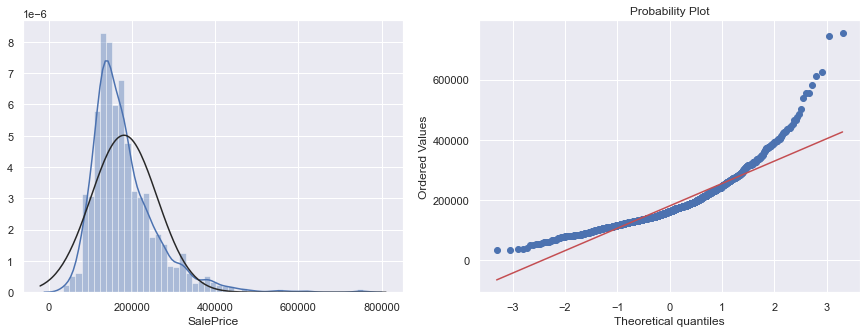

In [45]:
ColstoChkSkew = ['TotalBsmtSF', 'GrLivArea', 'SalePrice']
print('Skewness of the SalePrice column is {:.2f}' .format(train['SalePrice'].skew()))
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
sns.distplot(train['SalePrice'], fit=stats.norm)
ax = plt.subplot(1,2,2)
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

We can see from the histogram and the normal probability plot that the distribution is skewed to the right. For more information on probablity plots, check out this [this article](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Probability_Plots.pdf).

As the distribution is skewed to the right, we can perform a log transform on it.

In [46]:
train['SalePrice'] = np.log(train['SalePrice'])

#check
train['SalePrice'].describe()

count    1456.000000
mean       12.024092
std         0.399882
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

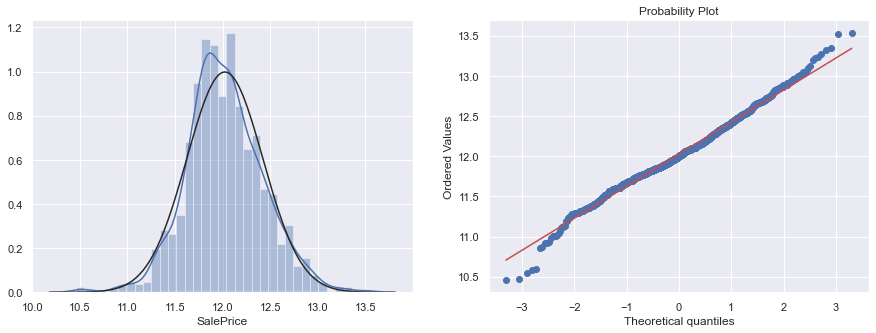

In [47]:
#check with plots
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
sns.distplot(train['SalePrice'], fit=stats.norm)
ax = plt.subplot(1,2,2)
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

SalePrice column follows a normal distribution. 

Now lets test GrLivArea.

Skewness of the GrLivArea column is 1.00


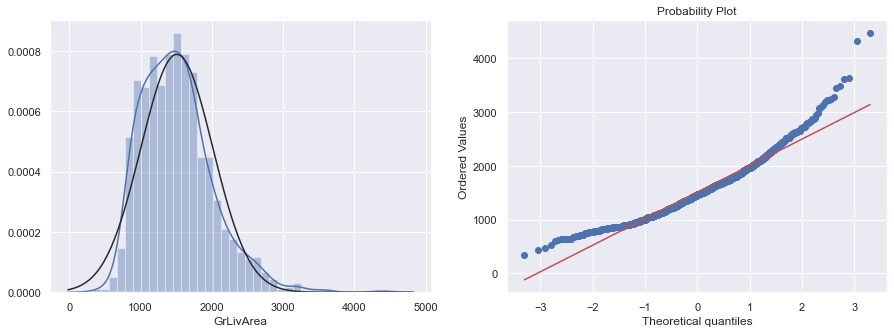

In [48]:
print('Skewness of the GrLivArea column is {:.2f}' .format(train['GrLivArea'].skew()))
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
sns.distplot(train['GrLivArea'], fit=stats.norm)
ax = plt.subplot(1,2,2)
stats.probplot(train['GrLivArea'], plot=plt)
plt.show()

There is a positive skew. Lets apply log-transform.

In [49]:
train['GrLivArea'] = np.log(train['GrLivArea'])

#check
train['GrLivArea'].describe()

count    1456.000000
mean        7.265770
std         0.329584
min         5.811141
25%         7.029530
50%         7.287217
75%         7.482119
max         8.406485
Name: GrLivArea, dtype: float64

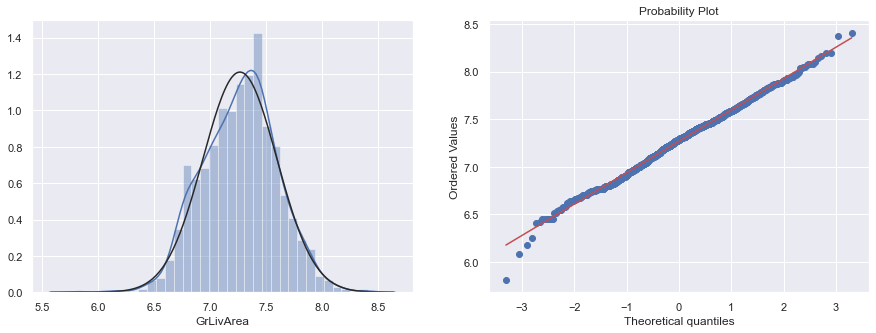

In [50]:
#check with plots
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
sns.distplot(train['GrLivArea'], fit=stats.norm)
ax = plt.subplot(1,2,2)
stats.probplot(train['GrLivArea'], plot=plt)
plt.show()

In [51]:
#we will also have to transform the GrLivArea in the test dataset
test['GrLivArea'] = np.log(test['GrLivArea'])

#check
test['GrLivArea'].describe()

count    1459.000000
mean        7.253745
std         0.316152
min         6.008813
25%         7.018849
50%         7.266827
75%         7.450661
max         8.536015
Name: GrLivArea, dtype: float64

Finally, lets check the TotalBsmtSF column

Skewness of the TotalBsmtSF column is 0.51


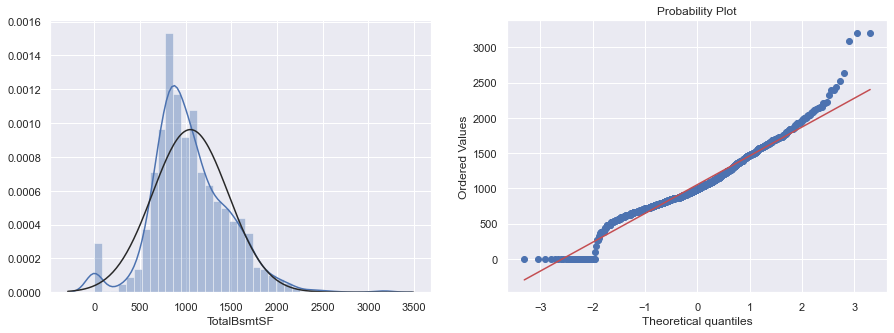

In [52]:
print('Skewness of the TotalBsmtSF column is {:.2f}' .format(train['TotalBsmtSF'].skew()))
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
sns.distplot(train['TotalBsmtSF'], fit=stats.norm)
ax = plt.subplot(1,2,2)
stats.probplot(train['TotalBsmtSF'], plot=plt)
plt.show()

The distribution is slightly right-skewed but a log transformation is not possible as there are rows with values = 0 (for homes with no basement). We'll leave this as is for now.

Before moving to categorical variables, lets check if we can create any new features from our numerical columns.

In [53]:
numerical_cols = train.select_dtypes(include=['int', 'float']).columns
numerical_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

We can use `YearBuilt` and `YrSold` columns to calculate the age of the house when it was sold. 

In [54]:
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
test['HouseAge'] = test['YrSold'] - test['YearBuilt']

In [55]:
print('Summary Statistic of HouseAge column in train dataset')
display(train['HouseAge'].describe())
print('*'*50)
print('Summary Statistic of HouseAge column in test dataset')
display(test['HouseAge'].describe())

Summary Statistic of HouseAge column in train dataset


count    1456.000000
mean       36.559753
std        30.225166
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: HouseAge, dtype: float64

**************************************************
Summary Statistic of HouseAge column in test dataset


count    1459.000000
mean       36.411926
std        30.432248
min        -1.000000
25%         7.000000
50%        34.000000
75%        55.000000
max       129.000000
Name: HouseAge, dtype: float64

In [56]:
test[test['HouseAge'] == -1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge
1089,2550,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,8.536015,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,None,None,17000,10,2007,New,Partial,-1


`HouseAge` of -1 in test dataset is probably a data entry error (`YrBuilt` is 2008 and `YrSold` is 2007). Since we cannot delete the row (its part of the test set), we will change the value of `YrSold` to 2008.

In [57]:
idx = test[test['HouseAge'] == -1].index
test['YrSold'].iloc[idx] = 2008

#redo HouseAge column
test['HouseAge'].iloc[idx] = test['YrSold'].iloc[idx] - test['YearBuilt'].iloc[idx]

#check to see if worked
test.iloc[idx]

/Users/neha/opt/miniconda3/envs/datasci-scikit/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge
1089,2550,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,8.536015,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,None,None,17000,10,2008,New,Partial,0


Skewness of the HouseAge column is 0.61


<AxesSubplot:xlabel='HouseAge', ylabel='SalePrice'>

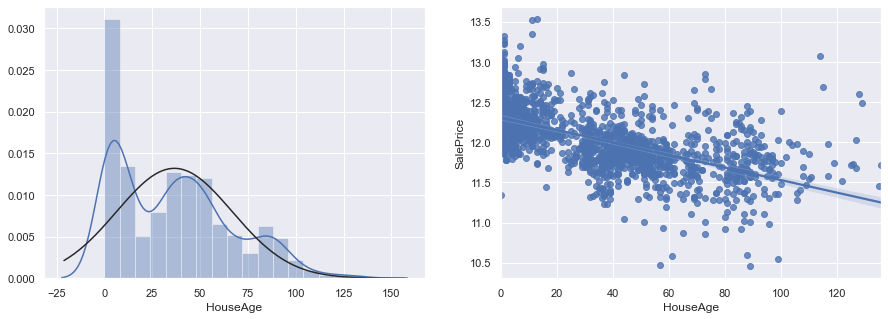

In [58]:
print('Skewness of the HouseAge column is {:.2f}' .format(train['HouseAge'].skew()))
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
sns.distplot(train['HouseAge'], fit=stats.norm)
ax = plt.subplot(1,2,2)
sns.regplot(train['HouseAge'], train['SalePrice'])

We see a negative relation between the age of the house and its SalePrice. The column is skewed to the right but we cannot do a log transform as there are rows with value = 0.

Finally, lets combine the bath columns in the test and train dataset to get one column with total number of bathrooms.

In [59]:
train['TotalBaths'] = train['BsmtFullBath']  + train['FullBath'] + ((train['HalfBath'] + train['BsmtHalfBath'])*0.5)
test['TotalBaths'] = test['BsmtFullBath']  + test['FullBath'] + ((test['HalfBath'] + test['BsmtHalfBath'])*0.5)

In [60]:
display(train['TotalBaths'].describe())
display(test['TotalBaths'].describe())

count    1456.000000
mean        2.208448
std         0.781217
min         1.000000
25%         2.000000
50%         2.000000
75%         2.500000
max         6.000000
Name: TotalBaths, dtype: float64

count    1457.000000
mean        2.226150
std         0.831114
min         1.000000
25%         1.500000
50%         2.000000
75%         3.000000
max         7.000000
Name: TotalBaths, dtype: float64

<AxesSubplot:xlabel='TotalBaths', ylabel='SalePrice'>

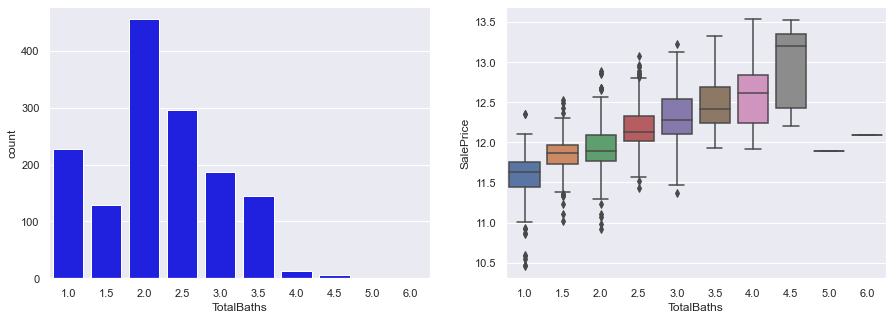

In [61]:
#print('Skewness of the HouseAge column is {:.2f}' .format(train['HouseAge'].skew()))
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
sns.countplot(train['TotalBaths'], color='Blue')
ax = plt.subplot(1,2,2)
sns.boxplot(train['TotalBaths'], train['SalePrice'])

In [62]:
train[train['TotalBaths'] >=5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,TotalBaths
736,739,90,RL,60.0,10800,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,1200,Unf,0,0,1200,GasA,TA,Y,SBrkr,1200,0,0,7.090077,3,0,3,0,3,1,TA,5,Typ,0,None,None,0.0,None,0,0,None,None,Y,120,0,0,0,0,0,None,None,None,0,3,2009,WD,Alloca,12.095141,22,6.0
919,922,90,RL,67.0,8777,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,Duplex,1.5Fin,5,7,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1084,Unf,0,188,1272,GasA,Gd,Y,SBrkr,1272,928,0,7.696213,2,0,2,2,4,2,TA,9,Typ,0,None,None,0.0,None,0,0,None,None,N,0,70,0,0,0,0,None,GdPrv,None,0,9,2008,WD,Normal,11.890677,108,5.0


There are only 2 data points for `TotalBaths` = 5 and 6. The SalePrice for those do not correlate with the rest of the `TotalBaths` and `SalePrice` values. They are clearly outliers. Lets delete them.

In [63]:
train = train.drop(index=train[train['TotalBaths'] >=5].index)

#check
train.shape

(1454, 83)

Lets do a final check of the correlation values for our numerical columns to confirm the columns we will be using as well as the correlation of the new columns to the SalePrice.

In [64]:
abs(train.corr()['SalePrice']).sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.821821
GrLivArea        0.739239
GarageCars       0.689409
TotalBaths       0.685592
GarageArea       0.660192
TotalBsmtSF      0.647644
1stFlrSF         0.620385
FullBath         0.597044
HouseAge         0.589832
YearBuilt        0.589125
YearRemodAdd     0.566141
TotRmsAbvGrd     0.541181
Fireplaces       0.492467
MasVnrArea       0.430719
BsmtFinSF1       0.393018
GarageYrBlt      0.356381
LotFrontage      0.351895
WoodDeckSF       0.334201
OpenPorchSF      0.325047
2ndFlrSF         0.320290
HalfBath         0.316272
LotArea          0.260462
BsmtFullBath     0.240031
BsmtUnfSF        0.222194
BedroomAbvGr     0.210547
KitchenAbvGr     0.149970
EnclosedPorch    0.149218
ScreenPorch      0.121211
MSSubClass       0.075656
PoolArea         0.074342
MoSold           0.057862
3SsnPorch        0.054896
LowQualFinSF     0.042957
YrSold           0.037389
OverallCond      0.037195
MiscVal          0.020047
Id               0.016865
BsmtHalfBath

We can see that both `TotalBaths` and `HouseAge` have a high correlation to the `SalePrice`.

### Encoding catergorical variables

In [65]:
test.isnull().sum()[test.isnull().sum() > 0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
TotalBaths      2
dtype: int64

Based on our exploratory data analysis, we identifies the following catergorical columns as important - 
`MSZoning, Neighborhood, LotShape, MasVnrType, ExternalQual, KitchenQual, HeatingQC, GarageFinish,  BsmtQual, CentralAir`

Before encoding, lets fill the missing values (if any) in the test dataset for the above columns.

In [66]:
def fill_missing(df):
    df['MSZoning'].fillna(value=train['MSZoning'].mode()[0], inplace=True)
    df['KitchenQual'].fillna(value=train['KitchenQual'].mode()[0], inplace=True)
    df['GarageCars'].fillna(value=train['GarageCars'].median(), inplace=True)
    df['TotalBaths'].fillna(value=train['TotalBaths'].median(), inplace=True)
    return df

test = fill_missing(test)

In [67]:
#check
test.isnull().sum()[test.isnull().sum() > 0]

Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
Functional      2
GarageArea      1
SaleType        1
dtype: int64

Let check the categorical columns one by one and figure out how to encode them.

There is an appreciable difference between the different zoning values except RH & RM that have a similar spread. I'll encode the 2 together and rest of them seperately.

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

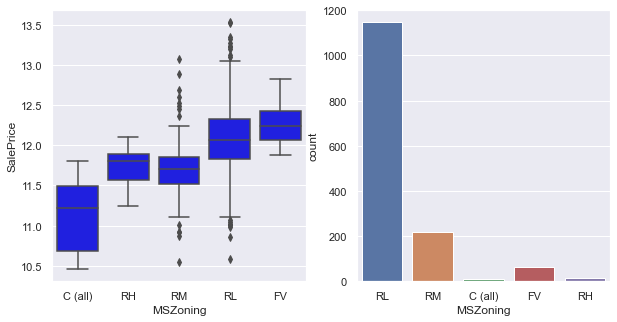

In [68]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.boxplot(train['MSZoning'], train['SalePrice'], color='Blue', order=['C (all)', 'RH', 'RM', 'RL', 'FV'])
ax = plt.subplot(1,2,2)
sns.countplot(train['MSZoning'])

In [69]:
train['MSZoning_enc'] = train['MSZoning'].map({'C (all)': 0,
                                               'RH': 1,
                                               'RM': 1,
                                               'RL': 2,
                                               'FV': 3
                                              })
test['MSZoning_enc'] = test['MSZoning'].map({'C (all)': 0,
                                               'RH': 1,
                                               'RM': 1,
                                               'RL': 2,
                                               'FV': 3
                                              })
#check
train['MSZoning_enc'].value_counts()

2    1146
1     233
3      65
0      10
Name: MSZoning_enc, dtype: int64

<AxesSubplot:xlabel='LotShape', ylabel='count'>

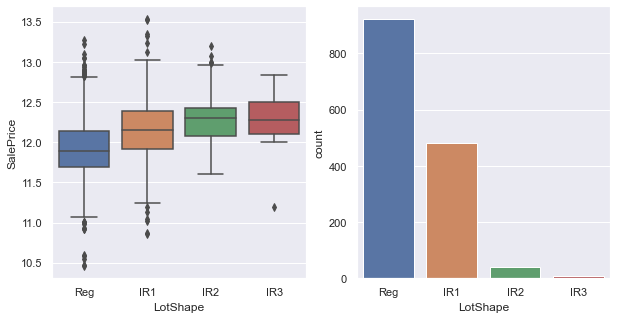

In [70]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.boxplot(train['LotShape'], train['SalePrice'])
ax = plt.subplot(1,2,2)
sns.countplot(train['LotShape'])

we can encode the above column based on if the LotShape is regular or not.

In [71]:
train['Reg_LotShape'] = train['LotShape'].apply(lambda x: 1 if x =='Reg' else 0)
test['Reg_LotShape'] = test['LotShape'].apply(lambda x: 1 if x =='Reg' else 0)

In [72]:
#check
train[['Reg_LotShape', 'LotShape']].head(10)

,Reg_LotShape,LotShape
0,1,Reg
1,1,Reg
2,0,IR1
3,0,IR1
4,0,IR1
5,0,IR1
6,1,Reg
7,0,IR1
8,1,Reg
9,1,Reg


<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

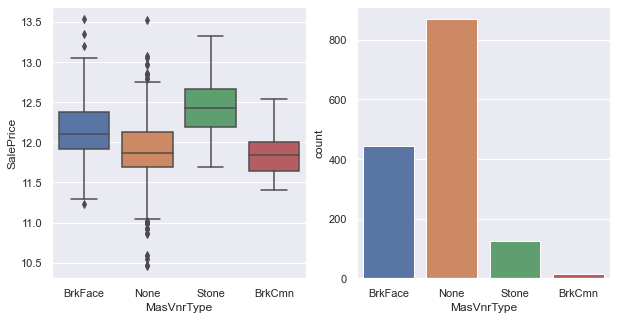

In [73]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.boxplot(train['MasVnrType'], train['SalePrice'])
ax = plt.subplot(1,2,2)
sns.countplot(train['MasVnrType'])

In [74]:
#combine BrkFace & BrkCmn together
train['MasVnrType_enc'] = train['MasVnrType'].map({'None': 0,
                                                   'BrkFace': 1,
                                                   'BrkCmn': 1,
                                                   'Stone': 2
                                                  })

test['MasVnrType_enc'] = test['MasVnrType'].map({'None': 0,
                                                   'BrkFace': 1,
                                                   'BrkCmn': 1,
                                                   'Stone': 2
                                                  })

#check
train['MasVnrType_enc'].value_counts()

0    868
1    460
2    126
Name: MasVnrType_enc, dtype: int64

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

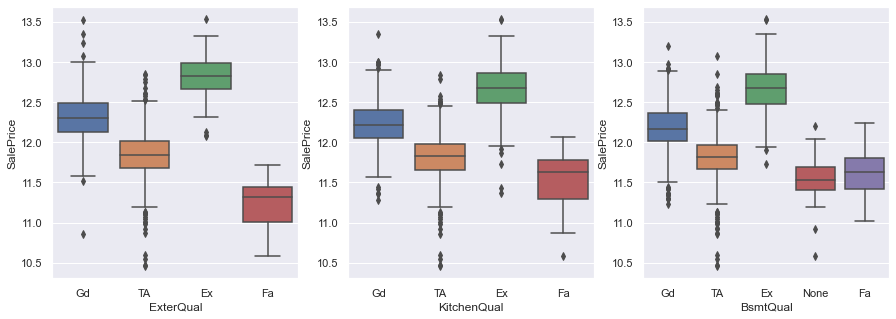

In [75]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
sns.boxplot(train['ExterQual'], train['SalePrice'])
ax = plt.subplot(1,3,2)
sns.boxplot(train['KitchenQual'], train['SalePrice'])
ax = plt.subplot(1,3,3)
sns.boxplot(train['BsmtQual'], train['SalePrice'])

In [76]:
#create dummy variables for other cols

map_values = {
    'Fa': 0,
    'TA': 1,
    'Gd': 2,
    'Ex': 3
}

map_bsmt_vals = {
    'None': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}

map_heat_vals = {
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}

map_garage_vals = {
    'None': 0,
    'Unf': 1,
    'RFn': 2,
    'Fin': 3
}

def encode_cols(df):
    df['ExterQual_enc'] = df['ExterQual'].map(map_values)
    df['KitchenQual_enc'] = df['KitchenQual'].map(map_values)
    df['BsmtQual_enc'] = df['BsmtQual'].map(map_bsmt_vals)
    df['HeatingQC_enc'] = df['HeatingQC'].map(map_heat_vals)
    df['GarageFinish_enc'] = df['GarageFinish'].map(map_garage_vals)
    df['CentralAir_enc'] = pd.get_dummies(df['CentralAir'], drop_first=True)
    return df


train = encode_cols(train)
test = encode_cols(test)

In [77]:
#finally create dummy variables for Neighborhood column

train = pd.concat([train, pd.get_dummies(train['Neighborhood'], prefix='Neighborhood')], axis=1)
test = pd.concat([test, pd.get_dummies(test['Neighborhood'], prefix='Neighborhood')], axis=1)

In [78]:
#check
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,TotalBaths,MSZoning_enc,Reg_LotShape,MasVnrType_enc,ExterQual_enc,KitchenQual_enc,BsmtQual_enc,HeatingQC_enc,GarageFinish_enc,CentralAir_enc,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247694,5,3.5,2,1,1,2,2,3,4,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109011,31,2.5,2,1,0,1,1,3,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317167,7,3.5,2,0,1,2,2,3,4,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849398,91,2.0,2,0,0,1,2,2,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429216,8,3.5,2,0,1,2,2,3,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [79]:
#check
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge,TotalBaths,MSZoning_enc,Reg_LotShape,MasVnrType_enc,ExterQual_enc,KitchenQual_enc,BsmtQual_enc,HeatingQC_enc,GarageFinish_enc,CentralAir_enc,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,49,1.0,1,1,0,1,1,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,52,1.5,2,0,1,1,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,13,2.5,2,0,0,1,1,3,3,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,12,2.5,2,0,1,1,2,2,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,18,2.0,2,0,0,2,2,3,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


This finishes our feature engineering step. Lets save the train & test dataset before moving to modeling. 

In [80]:
train.to_csv('Data/PostFeatureEng_train.csv', index=False)
test.to_csv('Data/PostFeatureEng_test.csv', index=False)